# Analysis of the impact of economic activity on the quality of life of Colombians

## Problem description

Quality of life is understood as personal wellbeing derived from satisfaction or dissatisfaction in areas that are important to a person (Urzúa et al, 2012). That wellbeing is directly related to many external variables (figure 1), such as access to public services, income level, family and social environment, etc. In that way, the type of economic activity in which a person works directly influences their quality of life, since it has a direct impact on factors such as income level, state of mind and health, access to leisure activities, etc.

Colombia has great potential to diversify its economy and is due to the potential of each region of the country. Given the characteristics of each territory, there are certain economic activities that have a greater impact on its economic growth and, therefore, on the quality of life of the people who inhabit it. For this reason, it is necessary to identify those activities that better stimulate the economy of each region, and thus positively impact people's quality of life.

![Quality of Life](./images/life_quality.png)
Figure 1:Source: DANE,2020

## General objective

Determine the impact of economic activity carried out by people in Colombia on their quality of life, based on the large comprehensive household survey.

### Specific goals

* Determine the main economic activities for each of the main cities of the country.

* Determine the relationship between economic activities and quality of life.

## Data sets description

The Large Integrated Household Survey is a statistical instrument developed by the National Administrative Department of Statistics - DANE. These are household surveys whose objective is to measure the labor market in Colombia and the main characteristics of Colombian households. Its main themes are: Income, property and savings / investment, employment, unemployment, economic situation and indicators, rural economy, housing, fertility, and the availability and use of specific social services.

The monthly sample is 20,669 households and 18,790 households. Its modules are:

* Identification
* Housing
* Household data
* Registration of persons
* General characteristics
* Social security in health
* Education
* H: Workforce
* Busy
* Unemployed
* Inactive
* Other activities
* Non-working income
* Micro-businesses
* Training for work
* Fertility
* Migration
* Child labor


The data collection date was in 2019. The data repository is in the National Data Archive (ANDA), data microsite,it can be consulted at the following link:

 http://microdatos.dane.gov.co/index.php/catalog/599/data_dictionary

### Datasets

**- General characteristics:**

This table has basic information about the size and structure of the workforce (employment, unemployment and inactivity). In addition, it allows obtaining data on other variables of the population such as: sex, age, marital status, education, etc.

It also makes it easier to measure household income both in money and in kind, the general characteristics of the population, housing, access to public services, access to public or private programs, the social protection system, and provides information on the quality of employment.

![Quality of Life](./images/dataset_01.png)
![Quality of Life](./images/dataset_02.png)


**- Housing and Homes:**

The data are disaggregated at the household and individual level; for each of the capital cities of Colombia and their metropolitan areas.
![Quality of Life](./images/dataset_03.png)
![Quality of Life](./images/dataset_04.png)

**Job occupation:**

The data are disaggregated at the household and individual level; for each of the capitals of Colombia and their metropolitan areas
![Quality of Life](./images/dataset_05.png)
![Quality of Life](./images/dataset_06.png)
![Quality of Life](./images/dataset_07.png)
![Quality of Life](./images/dataset_08.png)
![Quality of Life](./images/dataset_09.png)
![Quality of Life](./images/dataset_10.png)
![Quality of Life](./images/dataset_11.png)
![Quality of Life](./images/dataset_12.png)
![Quality of Life](./images/dataset_13.png)

### Import the libraries

In [1]:
import pandas as pd
import numpy as np
import pyreadstat
import os
from pandas_profiling import ProfileReport
import base64

### Global parameters

In [2]:
dane_path = '/home/jf/Documentos/Courses/DS4A/02 Submissions/03 Week 2 Project Submission/Analisys/DANE/'
data_year = 2019
file_type = '.spss'
months = {
    1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 5: 'Mayo', 6: 'Junio', 
    7: 'Julio', 8: 'Agosto', 9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'
}
people_filename = '╡rea - Características generales (Personas).sav'
housing_filename = '╡rea - Vivienda y Hogares.sav'
busy_filename = '╡rea - Ocupados.sav'

### getDataframe method

In [3]:
def getDataframe(fn):
    dfs = []
    for month in months:
        filename = os.path.join(
            dane_path, 
            str(data_year), 
            "{0}{1}".format(months[month], file_type), 
            fn
        )
        if file_type == '.dta':
            df_tmp, meta_tmp = pyreadstat.read_dta(filename)
        if file_type == '.spss':
            df_tmp, meta_tmp = pyreadstat.read_sav(filename)
        dfs.append(df_tmp)
#         print(fn, "->", months[month], data_year, ": ", df_tmp.shape)

    df = pd.concat(
        [dfs[0], dfs[1], dfs[2], dfs[3], dfs[4], dfs[5], dfs[6], dfs[7], dfs[9], dfs[9], dfs[10], dfs[11]],
        axis=0
    )
    return df, meta_tmp

### Import data

In [4]:
people_df, people_meta = getDataframe(people_filename)
housing_df, housing_meta = getDataframe(housing_filename)
busy_df, busy_meta = getDataframe(busy_filename)

In [5]:
pd.options.display.max_columns = 200

In [6]:
people_df.head(5)

,DIRECTORIO,SECUENCIA_P,ORDEN,HOGAR,REGIS,P6016,P6020,P6030S1,P6030S3,P6040,P6050,P6070,P6081,P6081S1,P6083,P6083S1,P6071,P6071S1,P6090,P6140,P6150,P6100,P6110,P6120,P6125,P6160,P6170,P6175,P6210,P6210S1,P6220,P6269,AREA,ESC,MES,DPTO,fex_c_2011
0,4804535.0,1.0,1.0,1.0,10,1.0,2.0,5.0,1948.0,70.0,1.0,5.0,3.0,NaN,3.0,NaN,NaN,NaN,1.0,NaN,NaN,3.0,NaN,NaN,2.0,2.0,2.0,NaN,3.0,1.0,NaN,NaN,05,1.0,01,05,930.626305
1,4804535.0,1.0,2.0,1.0,10,2.0,1.0,9.0,1980.0,38.0,3.0,6.0,3.0,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,3.0,NaN,NaN,2.0,1.0,2.0,NaN,3.0,3.0,NaN,NaN,05,3.0,01,05,930.626305
2,4804535.0,1.0,3.0,1.0,10,3.0,2.0,8.0,1995.0,23.0,3.0,4.0,3.0,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1.0,31250.0,2.0,1.0,2.0,NaN,5.0,11.0,2.0,NaN,05,11.0,01,05,930.626305
3,4804536.0,1.0,1.0,1.0,10,1.0,2.0,8.0,1997.0,21.0,1.0,6.0,2.0,NaN,2.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,5.0,NaN,2.0,1.0,2.0,NaN,5.0,11.0,2.0,NaN,05,11.0,01,05,1097.211116
4,4804536.0,1.0,2.0,1.0,10,1.0,2.0,10.0,2014.0,4.0,3.0,NaN,2.0,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,1.0,5.0,NaN,2.0,2.0,1.0,1.0,2.0,0.0,NaN,NaN,05,0.0,01,05,1097.211116


In [7]:
housing_df.head(5)

,DIRECTORIO,SECUENCIA_P,P5000,P5010,P5020,P5030,P5040,P5050,P5070,P5080,P5090,P5090S1,P5100,P5110,P5130,P5140,P5210S1,P5210S2,P5210S3,P5210S4,P5210S5,P5210S6,P5210S7,P5210S8,P5210S9,P5210S10,P5210S11,P5210S14,P5210S15,P5210S16,P5210S17,P5210S18,P5210S19,P5210S20,P5210S21,P5210S22,P5210S24,P5220,P5220S1,P6008,P6007,P6007S1,HOGAR,P4000,P4010,P4020,P4030S1,P4030S1A1,P4030S2,P4030S3,P4030S4,P4030S4A1,P4030S5,P4040,REGIS,AREA,MES,DPTO,fex_c_2011
0,4804535.0,1.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,,NaN,80000000.0,300000.0,NaN,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,3.0,2.0,NaN,1.0,2.0,1.0,4.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,01,05,01,05,930.626305
1,4804536.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,4.0,3.0,,NaN,NaN,NaN,250000.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,01,05,01,05,1097.211116
2,4804537.0,1.0,4.0,3.0,1.0,1.0,1.0,1.0,1.0,4.0,3.0,,NaN,NaN,NaN,424000.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,5.0,5.0,2.0,NaN,1.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,01,05,01,05,827.297496
3,4804538.0,1.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,,NaN,NaN,NaN,350000.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,4.0,2.0,NaN,1.0,2.0,1.0,4.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,01,05,01,05,1019.264427
4,4804539.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,,NaN,20000000.0,200000.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,NaN,1.0,1.0,1.0,4.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,01,05,01,05,970.521649


In [8]:
busy_df.head(5)

,DIRECTORIO,SECUENCIA_P,ORDEN,HOGAR,REGIS,AREA,P388,P6440,P6450,P6460,P6460S1,P6400,P6410,P6410S1,P6422,P6424S1,P6424S2,P6424S3,P6426,P6430S1,P6480,P6480S1,P9440,P6500,P6510,P6510S1,P6510S2,P6590,P6590S1,P6600,P6600S1,P6610,P6610S1,P6620,P6620S1,P6585S1,P6585S1A1,P6585S1A2,P6585S2,P6585S2A1,P6585S2A2,P6585S3,P6585S3A1,P6585S3A2,P6585S4,P6585S4A1,P6585S4A2,P6545,P6545S1,P6545S2,P6580,P6580S1,P6580S2,P6630S1,P6630S1A1,P6630S2,P6630S2A1,P6630S3,P6630S3A1,P6630S4,P6630S4A1,P6630S6,P6630S6A1,P6640,P6640S1,P6765,P6765S1,P6772,P6772S1,P6773S1,P6775,P6750,P6760,P550,P6780,P6780S1,P6790,P1800,P1800S1,P1801S1,P1801S2,P1801S3,P1802,P1879,P1805,P6800,P6810,P6810S1,P6850,P6830,P6830S1,P6870,P6880,P6880S1,P6915,P6915S1,P6920,P6930,P6940,P6960,P6980,P6980S1,P6980S2,P6980S3,P6980S4,P6980S5,P6980S6,P6980S7,P6980S7A1,P6980S8,P6990,P9450,P7020,P760,P7026,P7028,P7028S1,P7040,P390,P7045,P7050,P7050S1,P7070,P7075,P7077,P1880,P1881,P1882,P7090,P7100,P7110,P7120,P7130,P7140,P7140S1,P7140S2,P7140S3,P7140S4,P7140S5,P7140S6,P7140S7,P7140S8,P7140S9,P7140S9A1,P7150,P7160,P7170S1,P7170S5,P7170S6,P7180,P514,P515,P7240,P7240S1,OFICIO,RAMA2D,OCI,P6430,RAMA4D,RAMA4DP8,RAMA2DP8,INGLABO,MES,DPTO,fex_c_2011
0,4804535.0,1.0,2.0,1.0,60,05,5.0,1.0,1.0,NaN,NaN,1.0,NaN,,2.0,2.0,2.0,2.0,2.0,,1.0,,2.0,781242.0,2.0,NaN,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,NaN,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,NaN,.,32.0,2.0,,2.0,9.0,,2.0,,2.0,NaN,NaN,NaN,1.0,,NaN,NaN,NaN,NaN,NaN,NaN,,1.0,2.0,2.0,1.0,2.0,5.0,1.0,,2.0,NaN,NaN,NaN,,NaN,NaN,NaN,1.0,4.0,30.0,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,1.0,1.0,1.0,2.0,2.0,1.0,8.0,,95,45,1.0,1.0,4521,,,781242.0,01,05,930.626305
1,4804535.0,1.0,3.0,1.0,60,05,5.0,1.0,2.0,2.0,3.0,1.0,NaN,,1.0,1.0,2.0,1.0,3.0,,1.0,,2.0,781242.0,2.0,NaN,NaN,1.0,300000.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,NaN,1.0,88211.0,1.0,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,1.0,200000.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,NaN,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,.,52.0,2.0,,5.0,7.0,,1.0,,2.0,NaN,NaN,NaN,1.0,,NaN,NaN,NaN,NaN,NaN,NaN,,1.0,2.0,2.0,2.0,NaN,NaN,NaN,,2.0,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,4.0,60.0,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,1.0,1.0,1.0,2.0,1.0,1.0,3.0,,55,91,1.0,1.0,9191,,,1081242.0,01,05,930.626305
2,4804536.0,1.0,1.0,1.0,60,05,5.0,1.0,1.0,NaN,NaN,1.0,NaN,,2.0,2.0,2.0,2.0,12.0,,1.0,,2.0,600000.0,2.0,NaN,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,NaN,1.0,88211.0,2.0,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,NaN,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,2.0,,30.0,NaN,,4.0,7.0,,3.0,,2.0,NaN,NaN,NaN,1.0,,NaN,NaN,NaN,NaN,NaN,NaN,,1.0,2.0,2.0,2.0,NaN,NaN,NaN,,2.0,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,2.0,60.0,2.0,NaN,NaN,NaN,1.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,3.0,,79,18,1.0,1.0,1810,,,600000.0,01,05,1097.211116
3,4804537.0,1.0,1.0,1.0,60,05,5.0,1.0,1.0,NaN,NaN,1.0,NaN,,2.0,2.0,2.0,2.0,15.0,,1.0,,2.0,900000.0,2.0,NaN,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,NaN,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0,NaN,.,72.0,NaN,,2.0,6.0,,2.0,,2.0,NaN,NaN,NaN,1.0,,NaN,NaN,NaN,NaN,NaN,NaN,,1.0,2.0,2.0,1.0,0.0,6.0,1.0,,2.0,NaN,NaN,NaN,,NaN,NaN,NaN,3.0,13.0,25.0,2.0,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,3.0,,58,92,1.0,1.0,9242,,,900000.0,01,05,827.297496
4,4804537.0,1.0,3.0,1.0,60,05,5.0,1.0,2.0,1.0,NaN,1.0,NaN,,1.0,1.0,2.0,1.0,1.0,,4.0,,1.0,781242.0,2.0,NaN,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,NaN,1.0,88211.0,2.0,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,1.0,450000.0,2.0,NaN,2.0,Na

### Housing data dictionary

In [9]:
for column in housing_df.columns:
    print("Column: {0}".format(column))
    print("  Meaning: {0}".format(housing_meta.column_names_to_labels[column]))
    print("  Possible values: {0}".format(housing_meta.variable_value_labels[column] if column in housing_meta.variable_value_labels else ""))

Column: DIRECTORIO
  Meaning: Directorio
  Possible values: 
Column: SECUENCIA_P
  Meaning: Secuencia_p
  Possible values: 
Column: P5000
  Meaning: Incluyendo sala-comedor ¿de cuántos cuartos en total dispone este hogar?
  Possible values: 
Column: P5010
  Meaning: ¿en cuántos de esos cuartos duermen las personas de este hogar?
  Possible values: 
Column: P5020
  Meaning: El servicio sanitario que utiliza el hogar es:
  Possible values: {1.0: 'Inodoro conectado a alcantarillado', 2.0: 'Inodoro conectado a pozo séptico', 3.0: 'Inodoro sin conexión', 4.0: 'Letrina', 5.0: 'Bajamar', 6.0: 'No tiene servicio sanitario'}
Column: P5030
  Meaning: El servicio sanitario del hogar es:
  Possible values: {1.0: 'De uso exclusivo de las personas del hogar', 2.0: 'Compartido con personas de otros hogares'}
Column: P5040
  Meaning: ¿cómo eliminan principalmente la basura en este hogar?
  Possible values: {1.0: 'Por recolección pública o privada', 2.0: 'La tiran a un río, quebrada, caño o laguna', 3.

In [10]:
data_index = ['DIRECTORIO', 'HOGAR', 'REGIS', 'SECUENCIA_P', 'MES', 'AREA']
housing_df['ID'] = housing_df[data_index].apply(lambda x: '_'.join(x.values.astype(str)), axis=1)
housing_df.head(5)

,DIRECTORIO,SECUENCIA_P,P5000,P5010,P5020,P5030,P5040,P5050,P5070,P5080,P5090,P5090S1,P5100,P5110,P5130,P5140,P5210S1,P5210S2,P5210S3,P5210S4,P5210S5,P5210S6,P5210S7,P5210S8,P5210S9,P5210S10,P5210S11,P5210S14,P5210S15,P5210S16,P5210S17,P5210S18,P5210S19,P5210S20,P5210S21,P5210S22,P5210S24,P5220,P5220S1,P6008,P6007,P6007S1,HOGAR,P4000,P4010,P4020,P4030S1,P4030S1A1,P4030S2,P4030S3,P4030S4,P4030S4A1,P4030S5,P4040,REGIS,AREA,MES,DPTO,fex_c_2011,ID
0,4804535.0,1.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,,NaN,80000000.0,300000.0,NaN,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,3.0,2.0,NaN,1.0,2.0,1.0,4.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,01,05,01,05,930.626305,4804535.0_1.0_01_1.0_01_05
1,4804536.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,4.0,3.0,,NaN,NaN,NaN,250000.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,01,05,01,05,1097.211116,4804536.0_1.0_01_1.0_01_05
2,4804537.0,1.0,4.0,3.0,1.0,1.0,1.0,1.0,1.0,4.0,3.0,,NaN,NaN,NaN,424000.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,5.0,5.0,2.0,NaN,1.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,01,05,01,05,827.297496,4804537.0_1.0_01_1.0_01_05
3,4804538.0,1.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,,NaN,NaN,NaN,350000.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,4.0,2.0,NaN,1.0,2.0,1.0,4.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,01,05,01,05,1019.264427,4804538.0_1.0_01_1.0_01_05
4,4804539.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,,NaN,20000000.0,200000.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,NaN,1.0,1.0,1.0,4.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,01,05,01,05,970.521649,4804539.0_1.0_01_1.0_01_05


### House fields

In [11]:
housing_fields = {
    'DIRECTORIO': 'DIRECTORIO', 'SECUENCIA_P': 'SECUENCIA_P', 
    'P5000': 'Cuartos', 'P5010': 'Dormitorios', 'P5020': 'Sanitario', 'P5030': 'UsoSanitario',
    'P5040': 'Basuras', 'P5050': 'OrigenAgua', 'P5070': 'DondeCocina', 'P5080': 'CombustibleCocina',
    'P5090': 'TitularidadCasa', 'P5090S1': 'OtraTitularidad', 'P5100': 'Amortizacion', 
    'P5110': 'CostoVivienda', 'P5130': 'CostoArriendo', 'P5140': 'ArriendoMensual', 
    'P5210S1': 'Telefono', 'P5210S2': 'TVCable', 'P5210S3': 'Internet', 'P5210S4': 'Lavadora', 
    'P5210S5': 'Nevera', 'P5210S6': 'Licuadora', 'P5210S7': 'Estufa', 'P5210S8': 'Horno', 
    'P5210S9': 'Microondas', 'P5210S10': 'Calentador', 'P5210S11': 'TVColor', 'P5210S14': 'DVD',
    'P5210S15': 'EquipoSonido', 'P5210S16': 'Computador', 'P5210S17': 'Aspiradora', 'P5210S18': 'AireA',
    'P5210S19': 'Ventilador', 'P5210S20': 'Bicicleta', 'P5210S21': 'Motocicleta', 'P5210S22': 'CarroP',
    'P5210S24': 'ViviendaRecreo',  'P5220': 'Celular', 'P5220S1': 'PersonasCelular', 'P6008': 'PersonasHogar',
    'P6007': 'JefeAusente', 'P6007S1': 'ParentescoJefe', 'HOGAR': 'HOGAR', 'P4000': 'TipoVivienda',
    'P4010': 'Fachada', 'P4020': 'Pisos', 'P4030S1': 'Electricidad', 'P4030S1A1': 'Estrato', 
    'P4030S2': 'GasNatural', 'P4030S3': 'Alcantarillado', 'P4030S4': 'RecolecciónB', 
    'P4030S4A1': 'VecesRecolección', 'P4030S5': 'Acueducto', 'P4040': 'Acueducto724', 
    'REGIS': 'REGIS', 'clase': 'Clase', 'MES': 'MES', 'DPTO': 'Departamento', 'fex_c_2011': 'Factor', 
    'AREA': 'AREA'
}
len(housing_fields)

60

In [12]:
housing_df = housing_df.rename(columns=housing_fields)
housing_df

,DIRECTORIO,SECUENCIA_P,Cuartos,Dormitorios,Sanitario,UsoSanitario,Basuras,OrigenAgua,DondeCocina,CombustibleCocina,TitularidadCasa,OtraTitularidad,Amortizacion,CostoVivienda,CostoArriendo,ArriendoMensual,Telefono,TVCable,Internet,Lavadora,Nevera,Licuadora,Estufa,Horno,Microondas,Calentador,TVColor,DVD,EquipoSonido,Computador,Aspiradora,AireA,Ventilador,Bicicleta,Motocicleta,CarroP,ViviendaRecreo,Celular,PersonasCelular,PersonasHogar,JefeAusente,ParentescoJefe,HOGAR,TipoVivienda,Fachada,Pisos,Electricidad,Estrato,GasNatural,Alcantarillado,RecolecciónB,VecesRecolección,Acueducto,Acueducto724,REGIS,AREA,MES,Departamento,Factor,ID
0,4804535.0,1.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,,NaN,80000000.0,300000.0,NaN,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,3.0,2.0,NaN,1.0,2.0,1.0,4.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,01,05,01,05,930.626305,4804535.0_1.0_01_1.0_01_05
1,4804536.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,4.0,3.0,,NaN,NaN,NaN,250000.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,01,05,01,05,1097.211116,4804536.0_1.0_01_1.0_01_05
2,4804537.0,1.0,4.0,3.0,1.0,1.0,1.0,1.0,1.0,4.0,3.0,,NaN,NaN,NaN,424000.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,5.0,5.0,2.0,NaN,1.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,01,05,01,05,827.297496,4804537.0_1.0_01_1.0_01_05
3,4804538.0,1.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,,NaN,NaN,NaN,350000.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,4.0,2.0,NaN,1.0,2.0,1.0,4.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,01,05,01,05,1019.264427,4804538.0_1.0_01_1.0_01_05
4,4804539.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,,NaN,20000000.0,200000.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,NaN,1.0,1.0,1.0,4.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,01,05,01,05,970.521649,4804539.0_1.0_01_1.0_01_05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8863,5105306.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,,NaN,NaN,NaN,450000.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,5.0,2.0,NaN,1.0,2.0,1.0,4.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,01,50,12,50,271.972427,5105306.0_1.0_01_1.0_12_50
8864,5105307.0,1.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,4.0,3.0,,NaN,NaN,NaN,320000.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,4.0,6.0,2.0,NaN,1.0,2.0,1.0,4.0,1.0,2.0,2.0,1.0,1.0,3.0,1.0,1.0,01,52,12,52,235.524522,5105307.0_1.0_01_1.0_12_52
8865,5105308.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,4.0,4.0,,NaN,NaN,200000.0,NaN,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,NaN,1.0,4.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,3.0,1.0,1.0,01,52,12,52,192.348167,5105308.0_1.0_01_1.0_12_52
8866,5105309.0,1.0,5.0,3.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,,NaN,NaN,NaN,450000.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,3.0,2.0,NaN,1.0,1.0,1.0,4.0,1.0,3.0,1.0,1.0,1.0,3.0,1.0,1.0,01,66,12,66,395.432192,5105309.0_1.0_01_1.0_12_66


In [13]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110825 entries, 0 to 8867
Data columns (total 60 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   DIRECTORIO         110825 non-null  float64
 1   SECUENCIA_P        110825 non-null  float64
 2   Cuartos            110825 non-null  float64
 3   Dormitorios        110825 non-null  float64
 4   Sanitario          110825 non-null  float64
 5   UsoSanitario       110637 non-null  float64
 6   Basuras            110825 non-null  float64
 7   OrigenAgua         110825 non-null  float64
 8   DondeCocina        110825 non-null  float64
 9   CombustibleCocina  107706 non-null  float64
 10  TitularidadCasa    110825 non-null  float64
 11  OtraTitularidad    110825 non-null  object 
 12  Amortizacion       4711 non-null    float64
 13  CostoVivienda      43127 non-null   float64
 14  CostoArriendo      60439 non-null   float64
 15  ArriendoMensual    50386 non-null   float64
 16  Tele

### Selecting fields

In [14]:
selected_housing_fields = [
    'Cuartos', 'OrigenAgua', 'TitularidadCasa', 'Amortizacion',  'CostoVivienda', 'ArriendoMensual', 'Internet',
    'Computador', 'Bicicleta', 'Motocicleta', 'CarroP', 'Celular', 'PersonasCelular', 'PersonasHogar', 
    'TipoVivienda', 'Electricidad', 'Estrato', 'MES', 'Departamento',
]

- **Rooms field**

Null values found: 0


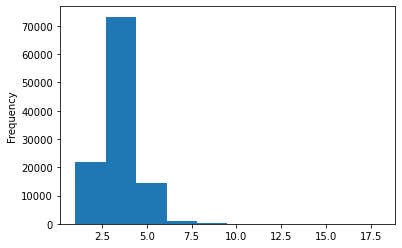

In [15]:
housing_df.Cuartos = housing_df.Cuartos.astype(int)
print("Null values found: {0}".format(housing_df.Cuartos.isnull().sum()))
housing_df.Cuartos.plot.hist();

- **Water source field**

Null values found: 0


{1.0: 'De acueducto por tubería',
 2.0: 'De otra fuente por tubería',
 3.0: 'De pozo con bomba',
 4.0: 'De pozo sin bomba, aljibe, jagüey o barreno',
 5.0: 'Aguas lluvias',
 6.0: 'Río, quebrada, nacimiento ó manantial',
 7.0: 'De pila pública',
 8.0: 'Carro tanque',
 9.0: 'Aguatero',
 10.0: 'Agua embotellada o en bolsa'}

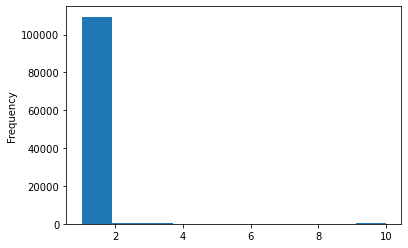

In [16]:
housing_df.Cuartos = housing_df.Cuartos.astype('category')
print("Null values found: {0}".format(housing_df.OrigenAgua.isnull().sum()))
housing_df.OrigenAgua.plot.hist();
housing_meta.variable_value_labels['P5050']

- **Housing ownership**

Null values found: 0


{1.0: 'Propia, totalmente pagada',
 2.0: 'Propia, la están pagando',
 3.0: 'En arriendo o subarriendo',
 4.0: 'En usufructo',
 5.0: 'Posesión sin titulo (ocupante de hecho) ó propiedad colectiv',
 6.0: 'Otra, ¿cuál?___________________'}

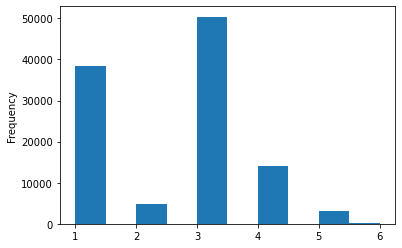

In [17]:
#housing_df.TitularidadCasa = housing_df.TitularidadCasa.astype('category')
print("Null values found: {0}".format(housing_df.TitularidadCasa.isnull().sum()))
housing_df.TitularidadCasa.plot.hist();
housing_meta.variable_value_labels['P5090']

In [18]:
housing_df[selected_housing_fields].describe()

,OrigenAgua,TitularidadCasa,Amortizacion,CostoVivienda,ArriendoMensual,Internet,Computador,Bicicleta,Motocicleta,CarroP,Celular,PersonasCelular,PersonasHogar,TipoVivienda,Electricidad,Estrato
count,110825.000000,110825.000000,4.711000e+03,4.312700e+04,5.038600e+04,110825.000000,110825.000000,110825.000000,110825.000000,110825.000000,110825.000000,107131.000000,110825.000000,110825.000000,110825.000000,110757.000000
mean,1.071798,2.451081,1.376918e+06,1.150000e+08,5.307042e+05,1.417361,1.588622,1.744291,1.746763,1.819680,1.033332,2.249246,3.244033,1.697577,1.000614,2.365701
std,0.747211,1.173965,1.596609e+07,1.354860e+08,4.436467e+06,0.493126,0.492086,0.436261,0.434868,0.384456,0.179502,1.128671,1.790983,0.599739,0.024763,1.151870
min,1.000000,1.000000,9.800000e+01,9.800000e+01,9.800000e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,3.500000e+05,1.600000e+07,3.000000e+05,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.000000,3.000000,6.000000e+05,8.000000e+07,4.000000e+05,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,3.000000,2.000000,1.000000,2.000000
75%,1.000000,3.000000,1.000000e+06,1.500000e+08,6.000000e+05,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,4.000000,2.000000,1.000000,3.000000
max,10.000000,6.000000,9.300000e+08,1.000000e+09,9.000000e+08,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,17.000000,28.000000,6.000000,2.000000,9.000000


In [ ]:
housing_df.Estrato.value_counts(ascending=False).plot(kind='bar', figsize=(15,6));

### Reports

In [ ]:
# df = people_df.merge(housing_df[selected_fields], how='inner', left_on=['DIRECTORIO', 'SECUENCIA_P'], right_on=['Directorio', 'Secuencia'])
# pr = ProfileReport(df)
# pr.to_file(output_file='reports/report.html')